In [1]:
import numpy as np # library to handle data in a vectorized manner

import pandas as pd # library for data analsysis
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import json # library to handle JSON files

!conda install -c conda-forge geopy --yes # uncomment this line if you haven't completed the Foursquare API lab
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

# import k-means from clustering stage
from sklearn.cluster import KMeans

!conda install -c conda-forge folium=0.5.0 --yes # uncomment this line if you haven't completed the Foursquare API lab
import folium # map rendering library

print('Libraries imported.')

Solving environment: done

# All requested packages already installed.

Solving environment: done

# All requested packages already installed.

Libraries imported.


# Part 1

Import table from Wikipedia

In [2]:
df = pd.read_html("https://en.wikipedia.org/wiki/Postal_codes_in_Singapore")
df = df[0]
df.drop(columns = ['Postal sector(1st 2 digits of 6-digit postal codes)'],inplace=True)
df

,Postal district,General location
0,1,"Raffles Place, Cecil, Marina, People's Park"
1,2,"Anson, Tanjong Pagar"
2,3,"Bukit Merah, Queenstown, Tiong Bahru"
3,4,"Telok Blangah, Harbourfront"
4,5,"Pasir Panjang, Hong Leong Garden, Clementi New..."
5,6,"High Street, Beach Road (part)"
6,7,"Middle Road, Golden Mile"
7,8,"Little India, Farrer Park, Jalan Besar, Lavender"
8,9,"Orchard, Cairnhill, River Valley"
9,10,"Ardmore, Bukit Timah, Holland Road, Tanglin"


The dataframe from wiki only shown postal district and general location.

The general location is grouped based on postal district number. 

It is not possible to extract latitude and longitude information based on the postal district. 

Therefore, it shall be proposed to split the general location into individual location and attempt to study the clustering based on each location. 

Drop Postal district and split location into individual location for each row

In [3]:
df.rename(columns={'Postal district':'PostalDistrict','General location':'Location'},inplace=True)
df.head()

,PostalDistrict,Location
0,1,"Raffles Place, Cecil, Marina, People's Park"
1,2,"Anson, Tanjong Pagar"
2,3,"Bukit Merah, Queenstown, Tiong Bahru"
3,4,"Telok Blangah, Harbourfront"
4,5,"Pasir Panjang, Hong Leong Garden, Clementi New..."


In [4]:
df_new = pd.DataFrame(df.Location.str.split(',').tolist(),index = df.PostalDistrict).stack()
df_new = df_new.reset_index([0, 'PostalDistrict'])
df_new.columns = ['Num','Location']
df_new.drop(columns=['Num'],inplace=True)
df_new

,Location
0,Raffles Place
1,Cecil
2,Marina
3,People's Park
4,Anson
5,Tanjong Pagar
6,Bukit Merah
7,Queenstown
8,Tiong Bahru
9,Telok Blangah


In [5]:
df_new.shape

(75, 1)

# Part 2

In [6]:
!pip install geocoder

In [7]:
address = 'Geylang, Singapore'

geolocator = Nominatim(user_agent="foursquare_agent")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print(latitude, longitude)

1.3181862 103.8870563


In [8]:
df_new.head()

,Location
0,Raffles Place
1,Cecil
2,Marina
3,People's Park
4,Anson


Code to extract Latitude and Longitude of the Location.

Note: Hong Leong Garden, Beach Road (Part) has no coordinates

In [9]:
df_new.drop([12, 15], inplace=True)
df_new.reset_index(drop=True, inplace=True)
df_new

,Location
0,Raffles Place
1,Cecil
2,Marina
3,People's Park
4,Anson
5,Tanjong Pagar
6,Bukit Merah
7,Queenstown
8,Tiong Bahru
9,Telok Blangah


In [10]:
def getLocationLatLon(names):
    
    location_list=[]
    for name in names:
        print(name)
        
        # Create address for current row
        address = '{}, Singapore'.format(name)
        
        # Get Latitude and Longitude for current row
        geolocator = Nominatim(user_agent="foursquare_agent")
        location = geolocator.geocode(address)
        latitude = location.latitude
        longitude = location.longitude
        print(latitude, longitude)
        
        # return only relevant information for each nearby venue
        location_list.append(
            [latitude, 
            longitude])

    loc_data = pd.DataFrame(location_list)
    loc_data.columns = ['Latitude', 
                  'Longitude']
    
    return(loc_data)

In [11]:
loc_df = getLocationLatLon(names=df_new['Location'])

Raffles Place
1.2844077 103.85139
 Cecil
1.2826449 103.8507869
 Marina
1.2904753 103.8520359
 People's Park
1.2858105 103.8441598
Anson
1.2758152 103.8464915
 Tanjong Pagar
1.2765707 103.845848
Bukit Merah
1.2806275 103.8305915
 Queenstown
1.2946235 103.8060454
 Tiong Bahru
1.2861968 103.8257646
Telok Blangah
1.2705858 103.8098632
 Harbourfront
1.2653951 103.8224032
Pasir Panjang
1.27620135 103.7914758234202
 Clementi New Town
1.3140256 103.7624098
High Street
1.2893011 103.8511455
Middle Road
1.3001677 103.8521451
 Golden Mile
1.3027465999999999 103.86518598382278
Little India
1.3066476 103.8492691
 Farrer Park
1.31259105 103.8542288478267
 Jalan Besar
1.3036427 103.8541924
 Lavender
1.3073719 103.862772
Orchard
1.305272 103.8328757
 Cairnhill
1.3065605 103.83943983779069
 River Valley
1.3083982 103.8861489
Ardmore
1.30875995 103.8295891925593
 Bukit Timah
1.3546901 103.7763724
 Holland Road
1.3064567 103.8168511
 Tanglin


GeocoderTimedOut: Service timed out

In [130]:
loc_df.head()

,Latitude,Longitude
0,1.284408,103.851390
1,1.282645,103.850787
2,1.290475,103.852036
3,1.285810,103.844160
4,1.275815,103.846491


In [133]:
df_coor = pd.merge(df_new,loc_df, left_index=True, right_index=True)
df_coor.head()

,Location,Latitude,Longitude
0,Raffles Place,1.284408,103.851390
1,Cecil,1.282645,103.850787
2,Marina,1.290475,103.852036
3,People's Park,1.285810,103.844160
4,Anson,1.275815,103.846491


Reset Index of df_coor

In [134]:
df_coor

,Location,Latitude,Longitude
0,Raffles Place,1.284408,103.851390
1,Cecil,1.282645,103.850787
2,Marina,1.290475,103.852036
3,People's Park,1.285810,103.844160
4,Anson,1.275815,103.846491
5,Tanjong Pagar,1.276571,103.845848
6,Bukit Merah,1.280628,103.830591
7,Queenstown,1.294623,103.806045
8,Tiong Bahru,1.286197,103.825765
9,Telok Blangah,1.270586,103.809863


In [139]:
df_coor.to_csv('df_coor',index=False)

In [12]:
df_coor = pd.read_csv('df_coor')
df_coor.head()

,Location,Latitude,Longitude
0,Raffles Place,1.284408,103.851390
1,Cecil,1.282645,103.850787
2,Marina,1.290475,103.852036
3,People's Park,1.285810,103.844160
4,Anson,1.275815,103.846491


# Part 3

## Foursquare API

In [13]:
import requests # library to handle requests
import pandas as pd # library for data analsysis
import numpy as np # library to handle data in a vectorized manner
import random # library for random number generation

!conda install -c conda-forge geopy --yes 
from geopy.geocoders import Nominatim # module to convert an address into latitude and longitude values

# libraries for displaying images
from IPython.display import Image 
from IPython.core.display import HTML 
    
# tranforming json file into a pandas dataframe library
from pandas.io.json import json_normalize

!conda install -c conda-forge folium=0.5.0 --yes
import folium # plotting library

print('Folium installed')
print('Libraries imported.')

Solving environment: done

# All requested packages already installed.

Solving environment: done

# All requested packages already installed.

Folium installed
Libraries imported.


## Define Foursquare credentials and version

In [14]:
CLIENT_ID = 'IQH0QIWBVFAJQDTKW1L5L5MSPL0U5OEWQG43SY0HEBCY5QEH' # your Foursquare ID
CLIENT_SECRET = 'IXP1FEHOC5XG2VQ1OB2OEEYBCOEJP1KY1TB41VEE1LODZTPO' # your Foursquare Secret
VERSION = '20180605'
LIMIT = 30
print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: IQH0QIWBVFAJQDTKW1L5L5MSPL0U5OEWQG43SY0HEBCY5QEH
CLIENT_SECRET:IXP1FEHOC5XG2VQ1OB2OEEYBCOEJP1KY1TB41VEE1LODZTPO


## Convert Singapore address to its latitude and longitude coordinates

In [15]:
address = 'Singapore'

geolocator = Nominatim(user_agent="foursquare_agent")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print(latitude, longitude)

1.357107 103.8194992


In [16]:
sg_data = df_coor
sg_data.head()

,Location,Latitude,Longitude
0,Raffles Place,1.284408,103.851390
1,Cecil,1.282645,103.850787
2,Marina,1.290475,103.852036
3,People's Park,1.285810,103.844160
4,Anson,1.275815,103.846491


In [17]:
sg_data.shape

(73, 3)

#### Remove whitespace in dataframe

In [18]:
sg_data_trimmed = sg_data.apply(lambda x: x.str.strip() if x.dtype == "object" else x)
sg_data_trimmed

,Location,Latitude,Longitude
0,Raffles Place,1.284408,103.851390
1,Cecil,1.282645,103.850787
2,Marina,1.290475,103.852036
3,People's Park,1.285810,103.844160
4,Anson,1.275815,103.846491
5,Tanjong Pagar,1.276571,103.845848
6,Bukit Merah,1.280628,103.830591
7,Queenstown,1.294624,103.806045
8,Tiong Bahru,1.286197,103.825765
9,Telok Blangah,1.270586,103.809863


In [19]:
sg_data_trimmed[sg_data_trimmed['Location'] == "People's Park"]

,Location,Latitude,Longitude
3,People's Park,1.28581,103.84416


In [20]:
sg_data = sg_data_trimmed

## Explore Neighbourhoods in Singapore

Getting top 100 venues at the particular Neighbourhood

In [21]:
radius = 500
LIMIT = 100

Create a function that explore all neighbourhoods in Singapore

In [22]:
# function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

In [23]:
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighbourhood', 
                  'Neighbourhood Latitude', 
                  'Neighbourhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [24]:
sg_venues = getNearbyVenues(names=sg_data['Location'],
                                   latitudes=sg_data['Latitude'],
                                   longitudes=sg_data['Longitude']
                                  )

Raffles Place
Cecil
Marina
People's Park
Anson
Tanjong Pagar
Bukit Merah
Queenstown
Tiong Bahru
Telok Blangah
Harbourfront
Pasir Panjang
Clementi New Town
High Street
Middle Road
Golden Mile
Little India
Farrer Park
Jalan Besar
Lavender
Orchard
Cairnhill
River Valley
Ardmore
Bukit Timah
Holland Road
Tanglin
Watten Estate
Novena
Thomson
Balestier
Toa Payoh
Serangoon
Macpherson
Braddell
Geylang
Eunos
Katong
Joo Chiat
Amber Road
Bedok
Upper East Coast
Eastwood
Kew Drive
Loyang
Changi
Simei
Tampines
Pasir Ris
Serangoon Garden
Hougang
Punggol
Bishan
Ang Mo Kio
Upper Bukit Timah
Clementi Park
Ulu Pandan
Jurong
Tuas
Hillview
Dairy Farm
Bukit Panjang
Choa Chu Kang
Lim Chu Kang
Tengah
Kranji
Woodgrove
Woodlands
Upper Thomson
Springleaf
Yishun
Sembawang
Seletar


In [25]:
print(sg_venues.shape)
sg_venues.head()

(2912, 7)


,Neighbourhood,Neighbourhood Latitude,Neighbourhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Raffles Place,1.284408,103.85139,CITY Hot Pot Shabu shabu,1.284173,103.851585,Hotpot Restaurant
1,Raffles Place,1.284408,103.85139,The Fullerton Bay Hotel,1.283878,103.853314,Hotel
2,Raffles Place,1.284408,103.85139,CULINARYON,1.284876,103.850933,Comfort Food Restaurant
3,Raffles Place,1.284408,103.85139,The Salad Shop,1.285523,103.851177,Salad Place
4,Raffles Place,1.284408,103.85139,Virgin Active,1.284608,103.850815,Gym / Fitness Center


In [26]:
sg_venues.rename(columns={'Neighbourhood':'Location','Neighbourhood Latitude':'Location Latitude','Neighbourhood Longitude':'Location Longitude'},inplace=True)

In [27]:
sg_venues.head()

,Location,Location Latitude,Location Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Raffles Place,1.284408,103.85139,CITY Hot Pot Shabu shabu,1.284173,103.851585,Hotpot Restaurant
1,Raffles Place,1.284408,103.85139,The Fullerton Bay Hotel,1.283878,103.853314,Hotel
2,Raffles Place,1.284408,103.85139,CULINARYON,1.284876,103.850933,Comfort Food Restaurant
3,Raffles Place,1.284408,103.85139,The Salad Shop,1.285523,103.851177,Salad Place
4,Raffles Place,1.284408,103.85139,Virgin Active,1.284608,103.850815,Gym / Fitness Center


Check number of venues returned for each neighbourhood

In [28]:
sg_group_count = sg_venues.groupby('Location').count()
sg_group_count.head()

,Location Latitude,Location Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
Location,,,,,,
Amber Road,46,46,46,46,46,46
Ang Mo Kio,41,41,41,41,41,41
Anson,100,100,100,100,100,100
Ardmore,77,77,77,77,77,77
Balestier,49,49,49,49,49,49


In [41]:
sg_group_asc = sg_group_count.sort_values(by='Venue',ascending=False).head(10)
sg_group_asc

,Location,Location Latitude,Location Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
12,Cecil,100,100,100,100,100,100
57,Tanjong Pagar,100,100,100,100,100,100
41,Orchard,100,100,100,100,100,100
44,People's Park,100,100,100,100,100,100
23,Harbourfront,100,100,100,100,100,100
2,Anson,100,100,100,100,100,100
47,Raffles Place,96,96,96,96,96,96
38,Marina,93,93,93,93,93,93
24,High Street,90,90,90,90,90,90
39,Middle Road,87,87,87,87,87,87


In [49]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

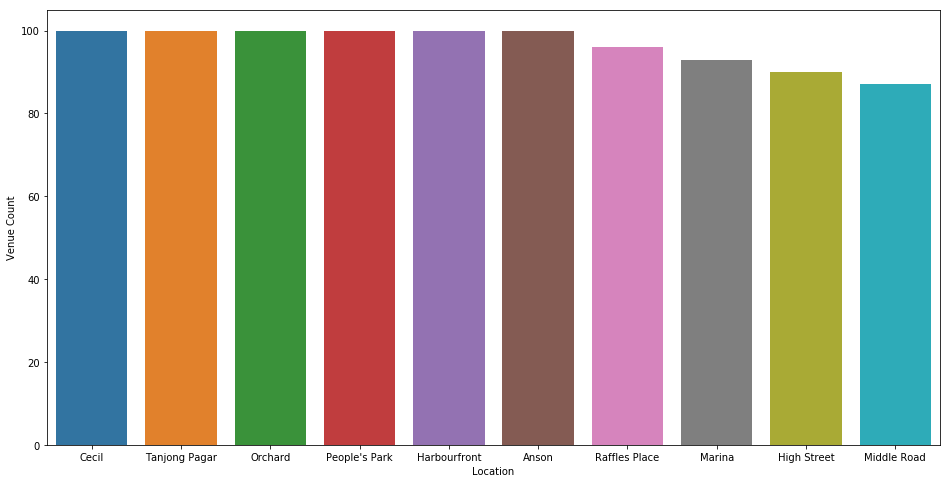

In [54]:
fig_dims = (16, 8)
fig, ax = plt.subplots(figsize=fig_dims)
pt = sns.barplot(x='Location',y='Venue',ax=ax,data=sg_group_asc)
pt.set(xlabel='Location', ylabel='Venue Count')
plt.show()

The location shown above are city center and central business districts. Therefore, there are a lot of venues identified by Foursquare which can be used for analysis. These locations should be the main area of interests in opening a new restaurant. 

In [42]:
sg_group_desc = sg_group_count.sort_values(by='Venue',ascending=True).head(10)
sg_group_desc

,Location,Location Latitude,Location Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
36,Loyang,1,1,1,1,1,1
62,Tuas,1,1,1,1,1,1
34,Lim Chu Kang,2,2,2,2,2,2
49,Seletar,4,4,4,4,4,4
17,Dairy Farm,8,8,8,8,8,8
19,Eunos,9,9,9,9,9,9
59,Thomson,9,9,9,9,9,9
32,Kranji,10,10,10,10,10,10
31,Kew Drive,11,11,11,11,11,11
29,Joo Chiat,11,11,11,11,11,11


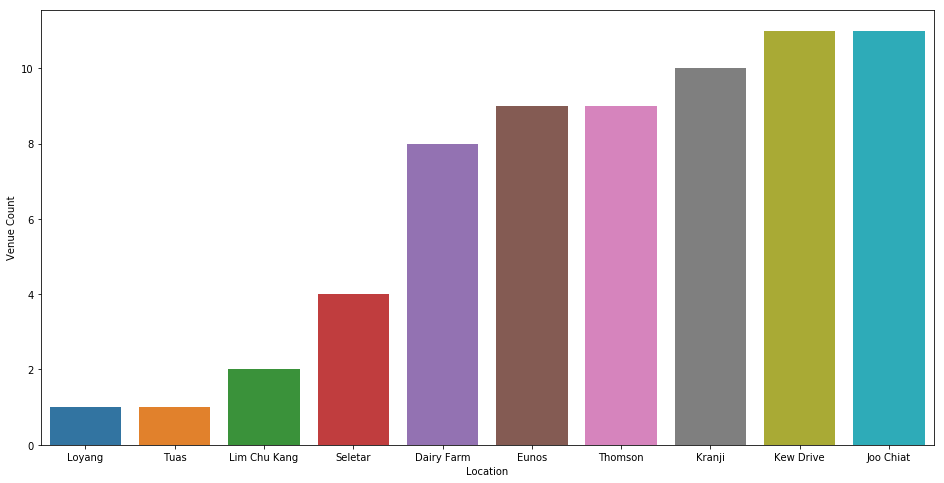

In [55]:
fig_dims = (16, 8)
fig, ax = plt.subplots(figsize=fig_dims)
pt = sns.barplot(x='Location',y='Venue',ax=ax,data=sg_group_desc)
pt.set(xlabel='Location', ylabel='Venue Count')
plt.show()

The locations shown above are mainly industrial areas and residential housing areas. Therefore, very few venues are identified by Foursquare which can be used for analysis. It is recommended to avoid areas mentioned above in the final analysis to identify suitable location to open a restaurant because there would not be a strong demand. 

In [29]:
sg_group_count.shape

(71, 6)

In [30]:
sg_group_count.reset_index(inplace=True)
sg_group_count.head()

,Location,Location Latitude,Location Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Amber Road,46,46,46,46,46,46
1,Ang Mo Kio,41,41,41,41,41,41
2,Anson,100,100,100,100,100,100
3,Ardmore,77,77,77,77,77,77
4,Balestier,49,49,49,49,49,49


3 rows are missing. Need to remove rows with missing data later after merging kmeans results with original data. 

In [31]:
print('There are {} uniques categories.'.format(len(sg_venues['Venue Category'].unique())))

There are 257 uniques categories.


## Analyze each Neighbourhood

In [32]:
# one hot encoding
sg_onehot = pd.get_dummies(sg_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
sg_onehot['Location'] = sg_venues['Location'] 

# move neighborhood column to the first column
fixed_columns = [sg_onehot.columns[-1]] + list(sg_onehot.columns[:-1])
sg_onehot = sg_onehot[fixed_columns]

sg_onehot.head()

,Location,Accessories Store,Airport,Airport Food Court,Airport Lounge,Airport Terminal,American Restaurant,Arcade,Argentinian Restaurant,Art Gallery,Art Museum,Arts & Crafts Store,Arts & Entertainment,Asian Restaurant,Athletics & Sports,Australian Restaurant,BBQ Joint,Bagel Shop,Bakery,Bank,Bar,Basketball Court,Bed & Breakfast,Beer Bar,Beer Garden,Bike Rental / Bike Share,Bike Trail,Bistro,Board Shop,Bookstore,Border Crossing,Boutique,Breakfast Spot,Brewery,Bridge,Bubble Tea Shop,Buffet,Building,Burger Joint,Burrito Place,Bus Line,Bus Station,Bus Stop,Business Service,Café,Canal,Candy Store,Cantonese Restaurant,Chinese Breakfast Place,Chinese Restaurant,Chocolate Shop,Churrascaria,Climbing Gym,Clothing Store,Club House,Cocktail Bar,Coffee Shop,College Academic Building,Comfort Food Restaurant,Concert Hall,Convenience Store,Cosmetics Shop,Cupcake Shop,Dance Studio,Deli / Bodega,Department Store,Dessert Shop,Dim Sum Restaurant,Diner,Discount Store,Dive Bar,Donut Shop,Dumpling Restaurant,Duty-free Shop,Eastern European Restaurant,Electronics Store,Event Space,Farm,Fast Food Restaurant,Filipino Restaurant,Fish & Chips Shop,Fishing Spot,Flea Market,Flower Shop,Food,Food & Drink Shop,Food Court,Food Stand,French Restaurant,Fried Chicken Joint,Frozen Yogurt Shop,Fruit & Vegetable Store,Fujian Restaurant,Furniture / Home Store,Gaming Cafe,Garden,Gas Station,Gastropub,General College & University,General Entertainment,German Restaurant,Gift Shop,Go Kart Track,Golf Course,Greek Restaurant,Grocery Store,Gym,Gym / Fitness Center,Hainan Restaurant,Hakka Restaurant,Halal Restaurant,Harbor / Marina,Health Food Store,History Museum,Hobby Shop,Hong Kong Restaurant,Hookah Bar,Hospital,Hostel,Hotel,Hotel Bar,Hotpot Restaurant,Ice Cream Shop,Indian Restaurant,Indonesian Restaurant,Italian Restaurant,Japanese Restaurant,Jewelry Store,Juice Bar,Karaoke Bar,Kebab Restaurant,Kids Store,Kitchen Supply Store,Korean Restaurant,Lake,Latin American Restaurant,Light Rail Station,Lighthouse,Lighting Store,Lottery Retailer,Lounge,Macanese Restaurant,Malay Restaurant,Market,Martial Arts Dojo,Massage Studio,Mediterranean Restaurant,Metro Station,Mexican Restaurant,Middle Eastern Restaurant,Miscellaneous Shop,Mobile Phone Shop,Modern European Restaurant,Monument / Landmark,Mosque,Motel,Motorcycle Shop,Mountain,Movie Theater,Multiplex,Museum,Music Store,Music Venue,Nature Preserve,Neighborhood,Night Market,Nightclub,Non-Profit,Noodle House,North Indian Restaurant,Office,Other Great Outdoors,Other Repair Shop,Outdoor Sculpture,Paella Restaurant,Pakistani Restaurant,Paper / Office Supplies Store,Park,Parking,Peking Duck Restaurant,Performing Arts Venue,Pet Store,Pharmacy,Pie Shop,Pizza Place,Playground,Plaza,Pool,Pop-Up Shop,Portuguese Restaurant,Post Office,Pub,Racetrack,Ramen Restaurant,Recreation Center,Residential Building (Apartment / Condo),Rest Area,Restaurant,River,Salad Place,Salon / Barbershop,Sandwich Place,Scenic Lookout,Sculpture Garden,Seafood Restaurant,Shaanxi Restaurant,Shabu-Shabu Restaurant,Shoe Store,Shopping Mall,Shopping Plaza,Skate Park,Smoke Shop,Snack Place,Soba Restaurant,Soccer Stadium,Soup Place,South Indian Restaurant,Southern / Soul Food Restaurant,Souvenir Shop,Spa,Spanish Restaurant,Speakeasy,Sporting Goods Shop,Sports Bar,Sports Club,Stadium,Stationery Store,Steakhouse,Street Food Gathering,Supermarket,Sushi Restaurant,Swiss Restaurant,Szechuan Restaurant,Tailor Shop,Taiwanese Restaurant,Tapas Restaurant,Taxi,Tea Room,Temple,Thai Restaurant,Theater,Thrift / Vintage Store,Tourist Information Center,Toy / Game Store,Trail,Train Station,Vegetarian / Vegan Restaurant,Video Game Store,Video Store,Vietnamese Restaurant,Waterfront,Whisky Bar,Wine Bar,Wine Shop,Wings Joint,Women's Store,Yoga Studio,Zoo Exhibit
0,Raffles Place,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0

In [33]:
sg_onehot.shape

(2912, 258)

Group rows by neighbourhood and taking the mean of the frequency of occurence of each category

In [34]:
sg_grouped = sg_onehot.groupby('Location').mean().reset_index()
sg_grouped

,Location,Accessories Store,Airport,Airport Food Court,Airport Lounge,Airport Terminal,American Restaurant,Arcade,Argentinian Restaurant,Art Gallery,Art Museum,Arts & Crafts Store,Arts & Entertainment,Asian Restaurant,Athletics & Sports,Australian Restaurant,BBQ Joint,Bagel Shop,Bakery,Bank,Bar,Basketball Court,Bed & Breakfast,Beer Bar,Beer Garden,Bike Rental / Bike Share,Bike Trail,Bistro,Board Shop,Bookstore,Border Crossing,Boutique,Breakfast Spot,Brewery,Bridge,Bubble Tea Shop,Buffet,Building,Burger Joint,Burrito Place,Bus Line,Bus Station,Bus Stop,Business Service,Café,Canal,Candy Store,Cantonese Restaurant,Chinese Breakfast Place,Chinese Restaurant,Chocolate Shop,Churrascaria,Climbing Gym,Clothing Store,Club House,Cocktail Bar,Coffee Shop,College Academic Building,Comfort Food Restaurant,Concert Hall,Convenience Store,Cosmetics Shop,Cupcake Shop,Dance Studio,Deli / Bodega,Department Store,Dessert Shop,Dim Sum Restaurant,Diner,Discount Store,Dive Bar,Donut Shop,Dumpling Restaurant,Duty-free Shop,Eastern European Restaurant,Electronics Store,Event Space,Farm,Fast Food Restaurant,Filipino Restaurant,Fish & Chips Shop,Fishing Spot,Flea Market,Flower Shop,Food,Food & Drink Shop,Food Court,Food Stand,French Restaurant,Fried Chicken Joint,Frozen Yogurt Shop,Fruit & Vegetable Store,Fujian Restaurant,Furniture / Home Store,Gaming Cafe,Garden,Gas Station,Gastropub,General College & University,General Entertainment,German Restaurant,Gift Shop,Go Kart Track,Golf Course,Greek Restaurant,Grocery Store,Gym,Gym / Fitness Center,Hainan Restaurant,Hakka Restaurant,Halal Restaurant,Harbor / Marina,Health Food Store,History Museum,Hobby Shop,Hong Kong Restaurant,Hookah Bar,Hospital,Hostel,Hotel,Hotel Bar,Hotpot Restaurant,Ice Cream Shop,Indian Restaurant,Indonesian Restaurant,Italian Restaurant,Japanese Restaurant,Jewelry Store,Juice Bar,Karaoke Bar,Kebab Restaurant,Kids Store,Kitchen Supply Store,Korean Restaurant,Lake,Latin American Restaurant,Light Rail Station,Lighthouse,Lighting Store,Lottery Retailer,Lounge,Macanese Restaurant,Malay Restaurant,Market,Martial Arts Dojo,Massage Studio,Mediterranean Restaurant,Metro Station,Mexican Restaurant,Middle Eastern Restaurant,Miscellaneous Shop,Mobile Phone Shop,Modern European Restaurant,Monument / Landmark,Mosque,Motel,Motorcycle Shop,Mountain,Movie Theater,Multiplex,Museum,Music Store,Music Venue,Nature Preserve,Neighborhood,Night Market,Nightclub,Non-Profit,Noodle House,North Indian Restaurant,Office,Other Great Outdoors,Other Repair Shop,Outdoor Sculpture,Paella Restaurant,Pakistani Restaurant,Paper / Office Supplies Store,Park,Parking,Peking Duck Restaurant,Performing Arts Venue,Pet Store,Pharmacy,Pie Shop,Pizza Place,Playground,Plaza,Pool,Pop-Up Shop,Portuguese Restaurant,Post Office,Pub,Racetrack,Ramen Restaurant,Recreation Center,Residential Building (Apartment / Condo),Rest Area,Restaurant,River,Salad Place,Salon / Barbershop,Sandwich Place,Scenic Lookout,Sculpture Garden,Seafood Restaurant,Shaanxi Restaurant,Shabu-Shabu Restaurant,Shoe Store,Shopping Mall,Shopping Plaza,Skate Park,Smoke Shop,Snack Place,Soba Restaurant,Soccer Stadium,Soup Place,South Indian Restaurant,Southern / Soul Food Restaurant,Souvenir Shop,Spa,Spanish Restaurant,Speakeasy,Sporting Goods Shop,Sports Bar,Sports Club,Stadium,Stationery Store,Steakhouse,Street Food Gathering,Supermarket,Sushi Restaurant,Swiss Restaurant,Szechuan Restaurant,Tailor Shop,Taiwanese Restaurant,Tapas Restaurant,Taxi,Tea Room,Temple,Thai Restaurant,Theater,Thrift / Vintage Store,Tourist Information Center,Toy / Game Store,Trail,Train Station,Vegetarian / Vegan Restaurant,Video Game Store,Video Store,Vietnamese Restaurant,Waterfront,Whisky Bar,Wine Bar,Wine Shop,Wings Joint,Women's Store,Yoga Studio,Zoo Exhibit
0,Amber Road,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.021739,0.000000,0.000000,0.043478,0.000000,0.043478,0.000000,0.000000,0.000000,0.000000,0.00

In [35]:
sg_grouped.shape

(71, 258)

Print each neighbourhood along with top 5 most common venues

In [36]:
num_top_venues = 5

for hood in sg_grouped['Location']:
    print("----"+hood+"----")
    temp = sg_grouped[sg_grouped['Location'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----Amber Road----
                 venue  freq
0                Hotel  0.09
1                 Café  0.09
2   Chinese Restaurant  0.07
3    Indian Restaurant  0.07
4  Japanese Restaurant  0.07


----Ang Mo Kio----
                 venue  freq
0          Coffee Shop  0.10
1           Food Court  0.07
2         Dessert Shop  0.07
3  Japanese Restaurant  0.05
4          Supermarket  0.05


----Anson----
                 venue  freq
0          Coffee Shop  0.12
1  Japanese Restaurant  0.09
2               Bakery  0.06
3   Italian Restaurant  0.04
4     Ramen Restaurant  0.04


----Ardmore----
                 venue  freq
0                Hotel  0.13
1  Japanese Restaurant  0.06
2                 Café  0.04
3  American Restaurant  0.04
4   Chinese Restaurant  0.04


----Balestier----
                  venue  freq
0    Chinese Restaurant  0.16
1                 Hotel  0.08
2      Asian Restaurant  0.06
3            Food Court  0.06
4  Fast Food Restaurant  0.06


----Bedok----
              

                venue  freq
0  Chinese Restaurant  0.06
1          Food Court  0.05
2              Hostel  0.05
3               Hotel  0.05
4  Seafood Restaurant  0.03


----Punggol----
                           venue  freq
0  Vegetarian / Vegan Restaurant  0.05
1                 Clothing Store  0.05
2                    Supermarket  0.05
3                           Café  0.05
4             Chinese Restaurant  0.05


----Queenstown----
                venue  freq
0          Food Court  0.27
1  Chinese Restaurant  0.13
2        Noodle House  0.13
3       Train Station  0.07
4             Stadium  0.07


----Raffles Place----
                 venue  freq
0                 Café  0.07
1          Salad Place  0.05
2         Cocktail Bar  0.05
3          Coffee Shop  0.05
4  Japanese Restaurant  0.05


----River Valley----
                venue  freq
0        Noodle House  0.16
1  Chinese Restaurant  0.12
2    Asian Restaurant  0.12
3          Food Court  0.08
4  Seafood Restaurant  0.08




Put into Pandas Dataframe

Function to sort venues in descending order

In [56]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

Create new dataframe and display top 10 venues for each neighbourhood

In [57]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Location']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
location_venues_sorted = pd.DataFrame(columns=columns)
location_venues_sorted['Location'] = sg_grouped['Location']

for ind in np.arange(sg_grouped.shape[0]):
    location_venues_sorted.iloc[ind, 1:] = return_most_common_venues(sg_grouped.iloc[ind, :], num_top_venues)

location_venues_sorted.head()

,Location,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Amber Road,Café,Hotel,Japanese Restaurant,Chinese Restaurant,Indian Restaurant,Italian Restaurant,Noodle House,Bar,Bakery,Karaoke Bar
1,Ang Mo Kio,Coffee Shop,Dessert Shop,Food Court,Supermarket,Snack Place,Bubble Tea Shop,Japanese Restaurant,Burger Joint,Sushi Restaurant,Ramen Restaurant
2,Anson,Coffee Shop,Japanese Restaurant,Bakery,Cocktail Bar,Ramen Restaurant,Café,Hotel,Salad Place,Italian Restaurant,Restaurant
3,Ardmore,Hotel,Japanese Restaurant,Chinese Restaurant,American Restaurant,Café,Bakery,Department Store,Ramen Restaurant,French Restaurant,Miscellaneous Shop
4,Balestier,Chinese Restaurant,Hotel,Food Court,Fast Food Restaurant,Asian Restaurant,Coffee Shop,Noodle House,Pet Store,Karaoke Bar,Convenience Store


In [58]:
location_venues_sorted.shape

(71, 11)

## Cluster Neighbourhoods

In [59]:
# set number of clusters
kclusters = 5

sg_grouped_clustering = sg_grouped.drop('Location', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(sg_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10] 

array([1, 1, 1, 1, 0, 1, 1, 0, 0, 1], dtype=int32)

In [60]:
k_count = kmeans.labels_
len(k_count)

71

Create new dataframe that includes cluster and top 10 venues for each neighbourhood

In [61]:
# add clustering labels
location_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)

sg_merged = sg_data

# merge toronto_grouped with toronto_data to add latitude/longitude for each neighborhood
sg_merged = sg_merged.join(location_venues_sorted.set_index('Location'), on='Location')

sg_merged.head() # check the last columns!

,Location,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Raffles Place,1.284408,103.851390,1.0,Café,Salad Place,Japanese Restaurant,Coffee Shop,Cocktail Bar,Gym / Fitness Center,Chinese Restaurant,Italian Restaurant,Bar,Hotel
1,Cecil,1.282645,103.850787,1.0,Café,Japanese Restaurant,Hotel,Coffee Shop,Salad Place,Korean Restaurant,Wine Bar,Chinese Restaurant,Cocktail Bar,Restaurant
2,Marina,1.290475,103.852036,1.0,Café,Cocktail Bar,Hotel,Coffee Shop,Shopping Mall,Restaurant,Bar,Bakery,Concert Hall,Italian Restaurant
3,People's Park,1.285810,103.844160,1.0,Chinese Restaurant,Hostel,Hotel,Food Court,Japanese Restaurant,Seafood Restaurant,Café,Spa,Vegetarian / Vegan Restaurant,Thai Restaurant
4,Anson,1.275815,103.846491,1.0,Coffee Shop,Japanese Restaurant,Bakery,Cocktail Bar,Ramen Restaurant,Café,Hotel,Salad Place,Italian Restaurant,Restaurant


In [62]:
sg_merged[sg_merged['Cluster Labels'].isnull()]

,Location,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
57,Jurong,1.259617,103.670471,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
64,Tengah,1.366902,103.710846,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [63]:
sg_merged.drop(sg_merged[sg_merged['Cluster Labels'].isnull()].index,inplace=True)

In [64]:
sg_merged['Cluster Labels'] = sg_merged['Cluster Labels'].astype(int)
sg_merged.head()

,Location,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Raffles Place,1.284408,103.851390,1,Café,Salad Place,Japanese Restaurant,Coffee Shop,Cocktail Bar,Gym / Fitness Center,Chinese Restaurant,Italian Restaurant,Bar,Hotel
1,Cecil,1.282645,103.850787,1,Café,Japanese Restaurant,Hotel,Coffee Shop,Salad Place,Korean Restaurant,Wine Bar,Chinese Restaurant,Cocktail Bar,Restaurant
2,Marina,1.290475,103.852036,1,Café,Cocktail Bar,Hotel,Coffee Shop,Shopping Mall,Restaurant,Bar,Bakery,Concert Hall,Italian Restaurant
3,People's Park,1.285810,103.844160,1,Chinese Restaurant,Hostel,Hotel,Food Court,Japanese Restaurant,Seafood Restaurant,Café,Spa,Vegetarian / Vegan Restaurant,Thai Restaurant
4,Anson,1.275815,103.846491,1,Coffee Shop,Japanese Restaurant,Bakery,Cocktail Bar,Ramen Restaurant,Café,Hotel,Salad Place,Italian Restaurant,Restaurant


In [65]:
sg_merged.shape

(71, 14)

In [66]:
# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(sg_merged['Latitude'], sg_merged['Longitude'], sg_merged['Location'], sg_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

## Cluster 0

In [67]:
sg_merged.loc[sg_merged['Cluster Labels'] == 0, sg_merged.columns[[0] + list(range(3, sg_merged.shape[1]))]]

,Location,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
6,Bukit Merah,0,Asian Restaurant,Café,Chinese Restaurant,Coffee Shop,Bookstore,Noodle House,Bakery,Restaurant,Thrift / Vintage Store,Bus Station
7,Queenstown,0,Food Court,Noodle House,Chinese Restaurant,Pool,Train Station,Spa,Stadium,Café,Seafood Restaurant,Italian Restaurant
8,Tiong Bahru,0,Chinese Restaurant,Coffee Shop,Bakery,Sushi Restaurant,Food Court,Japanese Restaurant,Hainan Restaurant,Bar,Noodle House,Sandwich Place
11,Pasir Panjang,0,Chinese Restaurant,Thai Restaurant,Asian Restaurant,Food Court,Monument / Landmark,Café,Noodle House,Metro Station,Office,Seafood Restaurant
22,River Valley,0,Noodle House,Asian Restaurant,Chinese Restaurant,Food Court,Seafood Restaurant,Coffee Shop,Dim Sum Restaurant,Supermarket,Cantonese Restaurant,Bar
30,Balestier,0,Chinese Restaurant,Hotel,Food Court,Fast Food Restaurant,Asian Restaurant,Coffee Shop,Noodle House,Pet Store,Karaoke Bar,Convenience Store
31,Toa Payoh,0,Noodle House,Chinese Restaurant,Food Court,Steakhouse,Snack Place,Coffee Shop,Asian Restaurant,Thai Restaurant,Bookstore,Bubble Tea Shop
34,Braddell,0,Noodle House,Chinese Restaurant,Café,Food Court,Hakka Restaurant,Bakery,Thai Restaurant,Fast Food Restaurant,Seafood Restaurant,Asian Restaurant
35,Geylang,0,Chinese Restaurant,Noodle House,Asian Restaurant,Food Court,Vegetarian / Vegan Restaurant,Dim Sum Restaurant,Grocery Store,Pool,Bus Station,Steakhouse
38,Joo Chiat,0,Seafood Restaurant,Noodle House,Bar,Malay Restaurant,Food Court,Coffee Shop,Chinese Restaurant,Gas Station,Spa,Juice Bar


## Cluster 1

In [68]:
sg_merged.loc[sg_merged['Cluster Labels'] == 1, sg_merged.columns[[0] + list(range(3, sg_merged.shape[1]))]]

,Location,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Raffles Place,1,Café,Salad Place,Japanese Restaurant,Coffee Shop,Cocktail Bar,Gym / Fitness Center,Chinese Restaurant,Italian Restaurant,Bar,Hotel
1,Cecil,1,Café,Japanese Restaurant,Hotel,Coffee Shop,Salad Place,Korean Restaurant,Wine Bar,Chinese Restaurant,Cocktail Bar,Restaurant
2,Marina,1,Café,Cocktail Bar,Hotel,Coffee Shop,Shopping Mall,Restaurant,Bar,Bakery,Concert Hall,Italian Restaurant
3,People's Park,1,Chinese Restaurant,Hostel,Hotel,Food Court,Japanese Restaurant,Seafood Restaurant,Café,Spa,Vegetarian / Vegan Restaurant,Thai Restaurant
4,Anson,1,Coffee Shop,Japanese Restaurant,Bakery,Cocktail Bar,Ramen Restaurant,Café,Hotel,Salad Place,Italian Restaurant,Restaurant
5,Tanjong Pagar,1,Coffee Shop,Bakery,Japanese Restaurant,Italian Restaurant,Hotel,Gym / Fitness Center,Cocktail Bar,Café,Korean Restaurant,Salad Place
9,Telok Blangah,1,Food Court,Coffee Shop,Cupcake Shop,Shopping Mall,Chinese Restaurant,Noodle House,Golf Course,Board Shop,Supermarket,Metro Station
10,Harbourfront,1,Chinese Restaurant,Fast Food Restaurant,Japanese Restaurant,Toy / Game Store,Clothing Store,Multiplex,Coffee Shop,Bakery,Department Store,Asian Restaurant
12,Clementi New Town,1,Food Court,Coffee Shop,Noodle House,Asian Restaurant,Dessert Shop,Shopping Mall,Electronics Store,Japanese Restaurant,Indian Restaurant,Sushi Restaurant
13,High Street,1,Café,Italian Restaurant,Cocktail Bar,Japanese Restaurant,Bar,Yoga Studio,Lounge,Shopping Mall,Concert Hall,Hotel


## Cluster 2

In [69]:
sg_merged.loc[sg_merged['Cluster Labels'] == 2, sg_merged.columns[[0] + list(range(3, sg_merged.shape[1]))]]

,Location,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
58,Tuas,2,Coffee Shop,Zoo Exhibit,Fishing Spot,Gaming Cafe,Furniture / Home Store,Fujian Restaurant,Fruit & Vegetable Store,Frozen Yogurt Shop,Fried Chicken Joint,French Restaurant


## Cluster 3

In [70]:
sg_merged.loc[sg_merged['Cluster Labels'] == 3, sg_merged.columns[[0] + list(range(3, sg_merged.shape[1]))]]

,Location,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
44,Loyang,3,Asian Restaurant,Zoo Exhibit,Fishing Spot,Gaming Cafe,Furniture / Home Store,Fujian Restaurant,Fruit & Vegetable Store,Frozen Yogurt Shop,Fried Chicken Joint,French Restaurant


## Cluster 4

In [71]:
sg_merged.loc[sg_merged['Cluster Labels'] == 4, sg_merged.columns[[0] + list(range(3, sg_merged.shape[1]))]]

,Location,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
63,Lim Chu Kang,4,Zoo Exhibit,Farm,Fishing Spot,Gaming Cafe,Furniture / Home Store,Fujian Restaurant,Fruit & Vegetable Store,Frozen Yogurt Shop,Fried Chicken Joint,French Restaurant


# Conclusion

Cluster 0 indicates that the majority of the neighbourhood in this cluster has a park and playground nearby.

Cluster 1 indicates that the majority of the neighbourhood in this cluster has Japanese, French, cafe and coffee shops. 

Cluster 2 indicates that the majority of the neighbourhood in this cluster has oriental restaurant and food court.  

Cluster 3 is a standalone cluster far from the city with coffee shop and zoo exhibit.

Cluster 4 is a standalone cluster far from the city with zoo exhibit and farm. 